In [49]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from tqdm import tqdm

In [69]:
def get_pickles(): 
    x_train = pickle.load(open(f'pickles/x_train.p', 'rb'))
    x_test = pickle.load(open(f'pickles/x_test.p', 'rb'))
    y_train = pickle.load(open(f'pickles/y_train.p', 'rb'))
    y_test = pickle.load(open(f'pickles/y_test.p', 'rb'))
    X = pickle.load(open('pickles/X.p', 'rb'))
    y = pickle.load(open('pickles/y.p', 'rb'))

    return (x_train, x_test, y_train, y_test), (X,y)

(x_train, x_test, y_train, y_test), (X,y) = get_pickles()


,amount_tsh,gps_height,population,permit,time_passed,target,basin_Lake Nyasa,basin_Lake Victoria,basin_Pangani,basin_Ruvuma / Southern Coast,basin_Internal,basin_Lake Tanganyika,basin_Wami / Ruvu,basin_Rufiji,basin_Lake Rukwa,extract_gravity,extract_submersible,extract_swn 80,extract_nira/tanira,extract_india mark ii,extract_extract_other,extract_ksb,extract_mono,extract_windmill,extract_afridev,extract_india mark iii,extract_cemo,extract_climax,extract_walimi,waterpoint_communal standpipe,waterpoint_communal standpipe multiple,waterpoint_hand pump,waterpoint_other,waterpoint_improved spring,waterpoint_cattle trough,waterpoint_dam,source_spring,source_rainwater harvesting,source_dam,source_machine dbh,source_other,source_shallow well,source_river,source_hand dtw,source_lake,quality_soft,quality_salty,quality_milky,quality_fluoride,quality_coloured,quantity_enough,quantity_insufficient,quantity_dry,quantity_seasonal,payment_pay annually,payment_never pay,payment_pay per bucket,payment_pay when scheme fails,payment_pay monthly
0,6000.0,1390,109.0,0,12,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0.0,1399,280.0,1,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,25.0,686,250.0,1,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.0,0,320.0,1,11,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
5,20.0,0,1.0,1,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27445,0.0,-25,1.0,1,37,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
54597,0.0,0,100.0,1,11,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
22869,0.0,-2,50.0,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
52111,25.0,1522,150.0,0,24,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [70]:
y_train = y_train.target.values.ravel()
y_test = y_test.target.values.ravel()
y = y.target.values.ravel()

### Baseline Testing for Models and Stacked

In [4]:


models = {'log': LogisticRegression(), 
          'knn': KNeighborsClassifier(),
          'dt': DecisionTreeClassifier(), 'bayes': GaussianNB(), 'rf': RandomForestClassifier(),
            }
#create stacked model
stack_m = [] 
for model, m in models.items(): 
    stack_m.append((model, m))
stack_model = StackingClassifier(estimators = stack_m, final_estimator = LogisticRegression(), cv = 5)
models['stacked'] = stack_model

#test each model and stacking
results = []
model_names = []
pbar = tqdm(models.items())
for model, m in pbar: 
    pbar.set_description(f'Evaluating {model.upper()}')
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 8, random_state = 10)
    scores = cross_val_score(m, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1, 
                             error_score = 'raise')
    results.append(scores)
    model_names.append(model)
    

Evaluating STACKED: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [09:41<00:00, 96.98s/it]


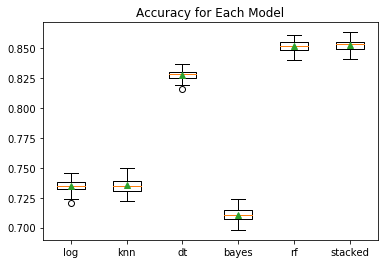

In [5]:
plt.boxplot(results, labels = model_names, showmeans = True)
plt.title('Accuracy for Each Vanilla Model')
plt.show()

### Decision Tree and Random Forest Hyperparameter Tuning

In [ ]:


param_grid = {
    'n_estimators': [50, 100, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10],
    'max_features': [i for i in range(5,7)],
    'bootstrap': [True, False]
}
forest = RandomForestClassifier()
gs = GridSearchCV(forest, param_grid, verbose = 1, n_jobs =3)
gs.fit(x_train, y_train) 
f_predict = gs.predict(x_test)
print(classification_report(y_test, f_predict))